In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import ast
import pandas as pd

In [2]:
df: pd.DataFrame = pd.read_csv("data/train.csv")

In [3]:
start = np.zeros((len(df), 2), dtype=np.float32)
cnt = 0
for i in range(len(df)):
    row_list = ast.literal_eval(df.iloc[i]["POLYLINE"])
    if len(row_list) == 0:
        continue
    start[i] = np.array(row_list)[-1]
    cnt += 1

In [4]:
start = start[:cnt]

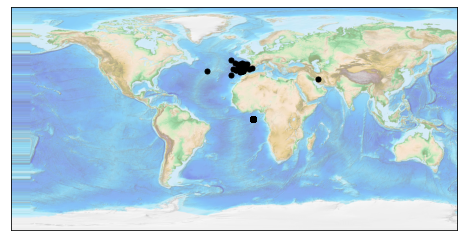

In [6]:
import plotly.express as px
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution=None,
            width=8E6, height=8E6,
            lat_0=37.5, lon_0=-15,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(start[:, 0], start[:, 1])
plt.plot(x, y, 'ok', markersize=5)
